# histogram dengan manual

In [ ]:
import numpy as np
import cv2

image = cv2.imread('laptop photo bnw.jpg', cv2.IMREAD_GRAYSCALE)

histogram = np.zeros(256, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        intensity = image[i, j]
        histogram[intensity] += 1

print(histogram)

AttributeError: 'NoneType' object has no attribute 'shape'

# contoh implementasi dengan python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
image = cv2.imread('photo bnw.jpg', cv2.IMREAD_GRAYSCALE)

# Menghitung histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Menampilkan gambar dan histogram
plt.figure(figsize=(12, 6))

# Menampilkan gambar grayscale
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Menampilkan histogram
plt.subplot(1, 2, 2)
plt.plot(histogram, color='black')
plt.title('Histogram Gambar Grayscale')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# histogram equalization


In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('photo bnw.jpg', cv2.IMREAD_GRAYSCALE)

# Menggunakan Histogram Equalization pada gambar grayscale
equalized_image = cv2.equalizeHist(image)

# Menampilkan gambar asli dan hasil equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

# histogram spescification

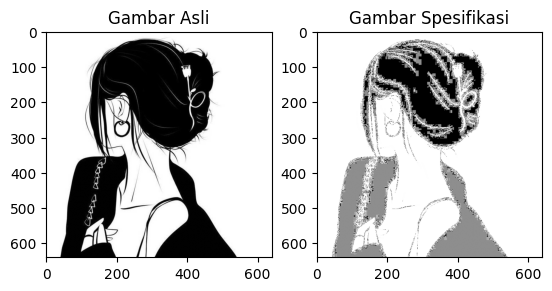

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_specification(source, target):
    # Hitung histogram dan distribusi kumulatif gambar sumber
    hist_source, _ = np.histogram(source.flatten(), 256, [0, 256])
    cdf_source = hist_source.cumsum()
    cdf_source = (255 * cdf_source / cdf_source[-1]).astype(np.uint8)

    # Hitung histogram dan distribusi kumulatif gambar target
    hist_target, _ = np.histogram(target.flatten(), 256, [0, 256])
    cdf_target = hist_target.cumsum()
    cdf_target = (255 * cdf_target / cdf_target[-1]).astype(np.uint8)

    # Ciptakan peta intensitas
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        diff = np.abs(cdf_target - cdf_source[i])
        mapping[i] = np.argmin(diff)

    # Terapkan peta intensitas pada gambar sumber
    return mapping[source]

# Baca gambar sumber (ganti 'sumber.jpg' dengan nama file Anda)
gambar = cv2.imread('photo bnw.jpg', 0) 

# Baca gambar target
gambar_target = cv2.imread('photo bnw(1).jpg', 0) # Pastikan gambar.jpg ada di direktori yang sama

# Terapkan spesifikasi histogram
gambar_spesifikasi = histogram_specification(gambar, gambar_target)

# Tampilkan hasil gambar spesifikasi
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(gambar, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gambar Spesifikasi')
plt.imshow(gambar_spesifikasi, cmap='gray')
plt.show()